# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [116]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df.head()

/Users/maxsteele/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compi

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [118]:
df['FormalEducation'].value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [119]:
df['AdjustedCompensation'].value_counts()

100000.000000    60
120000.000000    59
150000.000000    58
71749.560000     47
50000.000000     45
                 ..
70786.560000      1
6880.782804       1
36344.944000      1
106563.600000     1
48126.250000      1
Name: AdjustedCompensation, Length: 1627, dtype: int64

In [120]:
df['AdjustedCompensation'].mean()

6636071.346861625

In [121]:
ms_deg = df.groupby(['FormalEducation']).get_group('Master\'s degree')['AdjustedCompensation'].dropna()
print(len(ms_deg))
ms_deg.head()

1990


3     250000.000
14     36634.400
27     53352.000
31     35419.104
37     80000.000
Name: AdjustedCompensation, dtype: float64

In [122]:
bs_deg = df.groupby(['FormalEducation']).get_group('Bachelor\'s degree')['AdjustedCompensation'].dropna()
print(len(bs_deg))
bs_deg.head()

1107


8     64184.800
9     20882.400
11     1483.900
21    20000.000
25    10858.848
Name: AdjustedCompensation, dtype: float64

In [123]:
print(np.var(ms_deg, ddof=1), np.var(bs_deg, ddof=1))
# likely that the variances are unequal

18367624245.044666 94209629758.56929


In [124]:
print(np.mean(ms_deg), np.mean(bs_deg))

69139.8998712 64887.097994618794


In [125]:
# The two groups are of very different sizes (4811 with a bachelor's and 8204 with a master's), 
# so need to use Welch's t 
# Would assume that higher degree means higher pay, but let's do more conservative two-tail test just in case
import flatiron_stats as fst
fst.p_value_welch_ttest(ms_deg, bs_deg, two_sided=True)
# p-value much greater than alpha of 0.05, so unable to reject the null that the two groups are no 
# different in terms of mean compensation
# (note that would still fail to reject the null if used the one-tail test, because its p-value 
# would be half of what we got for the two-tail test, which would still be greater than 0.05)

0.6615527890254489

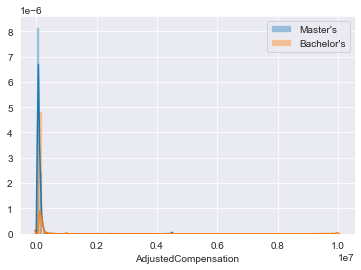

In [126]:
# but let's take a look at the distributions and see if there are any outliers
sns.distplot(ms_deg, label='Master\'s')
sns.distplot(bs_deg, label='Bachelor\'s')
plt.legend()
# definitely some outliers, really can't see much from this plot

In [127]:
print('Comparison of Adjusted Compensation for Master\'s vs Bachelor\'s')
print('Median Values: \tms_deg: {} \tbs_deg: {}'.format(round(ms_deg.median(),2), round(bs_deg.median(), 2)))
print('Mean Values: \tms_deg: {} \tbs_deg: {}'.format(round(ms_deg.mean(),2), round(bs_deg.mean(), 2)))
print('Sample Sizes: \tms_deg: {} \tbs_deg: {}'.format(len(ms_deg), len(bs_deg)))
print('Welch\'s t test p-value:', fst.p_value_welch_ttest(ms_deg, bs_deg)) # one tail default
# median for Master's is much higher (nearly $15k more), 
# but means are not all that different (less than $5k more for Master's on average)

Comparison of Adjusted Compensation for Master's vs Bachelor's
Median Values: 	ms_deg: 53812.17 	bs_deg: 38399.4
Mean Values: 	ms_deg: 69139.9 	bs_deg: 64887.1
Sample Sizes: 	ms_deg: 1990 	bs_deg: 1107
Welch's t test p-value: 0.33077639451272445


In [128]:
# Investigate percentiles
for q in np.linspace(0.8, 1, num=21):
    ms_q = round(ms_deg.quantile(q=q), 2)
    bs_q = round(bs_deg.quantile(q=q), 2)
    print('{}th percentile:\tMaster\'s: {}\tBachelor\'s: {}'.format(round(q,2), ms_q, bs_q))
    # obvious outliers for Master's salary - 99th to 100th jumps from $250k to $4.5 mil
    # obvious outliers for Bachelor's salary - 99th to 100th jumps from $250k to $9.99 mil

0.8th percentile:	Master's: 103000.0	Bachelor's: 93233.13
0.81th percentile:	Master's: 107009.0	Bachelor's: 95572.83
0.82th percentile:	Master's: 110000.0	Bachelor's: 99276.38
0.83th percentile:	Master's: 111503.83	Bachelor's: 100000.0
0.84th percentile:	Master's: 115240.4	Bachelor's: 103040.0
0.85th percentile:	Master's: 119582.6	Bachelor's: 105935.04
0.86th percentile:	Master's: 120000.0	Bachelor's: 110000.0
0.87th percentile:	Master's: 124719.88	Bachelor's: 112000.0
0.88th percentile:	Master's: 129421.46	Bachelor's: 115000.0
0.89th percentile:	Master's: 130000.0	Bachelor's: 120000.0
0.9th percentile:	Master's: 135000.0	Bachelor's: 120346.5
0.91th percentile:	Master's: 140000.0	Bachelor's: 126460.0
0.92th percentile:	Master's: 149640.0	Bachelor's: 132615.4
0.93th percentile:	Master's: 150000.0	Bachelor's: 140000.0
0.94th percentile:	Master's: 160000.0	Bachelor's: 143408.8
0.95th percentile:	Master's: 166778.6	Bachelor's: 150000.0
0.96th percentile:	Master's: 180000.0	Bachelor's: 1798

In [129]:
sum(ms_deg > 500000) # 5 outliers above $500k for Master's

5

In [130]:
sum(bs_deg > 500000) # 4 outliers above $500k for Bachelor's

4

In [131]:
# remove outliers and repeat
outlier_cutoff = 500000
ms_deg = ms_deg[ms_deg <= outlier_cutoff]
print(len(ms_deg))
bs_deg = bs_deg[bs_deg <= outlier_cutoff]
print(len(bs_deg))

1985
1103


In [132]:
print('Outliers Removed -- Comparison of Adjusted Compensation for Master\'s vs Bachelor\'s')
print('Median Values: \tms_deg: {} \tbs_deg: {}'.format(round(ms_deg.median(),2), round(bs_deg.median(), 2)))
print('Mean Values: \tms_deg: {} \tbs_deg: {}'.format(round(ms_deg.mean(),2), round(bs_deg.mean(), 2)))
print('Sample Sizes: \tms_deg: {} \tbs_deg: {}'.format(len(ms_deg), len(bs_deg)))
print('Welch\'s t test p-value:', fst.p_value_welch_ttest(ms_deg, bs_deg)) # one tail default
# p-value is very small, so find that the 2 groups are sig diff once ouliers have been removed from both

Outliers Removed -- Comparison of Adjusted Compensation for Master's vs Bachelor's
Median Values: 	ms_deg: 53539.72 	bs_deg: 38292.15
Mean Values: 	ms_deg: 63976.63 	bs_deg: 53744.35
Sample Sizes: 	ms_deg: 1985 	bs_deg: 1103
Welch's t test p-value: 4.4874583271514723e-07


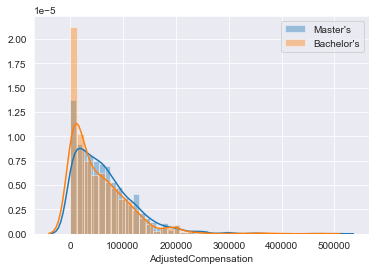

In [133]:
sns.distplot(ms_deg, label='Master\'s')
sns.distplot(bs_deg, label='Bachelor\'s')
plt.legend()

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [134]:
doc = df.groupby(['FormalEducation']).get_group('Doctoral degree')['AdjustedCompensation'].dropna()
print(len(doc))
doc.head()

967


22    100000.000
32    172144.440
34    133000.000
61     15000.000
72     43049.736
Name: AdjustedCompensation, dtype: float64

<AxesSubplot:xlabel='AdjustedCompensation'>

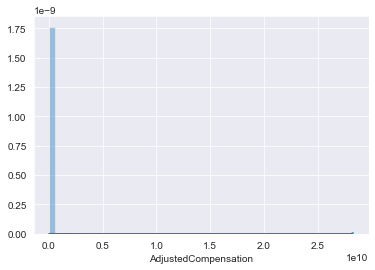

In [135]:
sns.distplot(doc)

In [140]:
# try testing before removing any outliers from either group
doc = df.groupby(['FormalEducation']).get_group('Doctoral degree')['AdjustedCompensation'].dropna()
bs = df.groupby(['FormalEducation']).get_group('Bachelor\'s degree')['AdjustedCompensation'].dropna()

print('Comparison of Adjusted Compensation for Doctoral vs Bachelor\'s')
print('Median Values: \tdoc: {} \tbs_deg: {}'.format(round(doc.median(),2), round(bs_deg.median(), 2)))
print('Mean Values: \tdoc: {} \tbs_deg: {}'.format(round(doc.mean(),2), round(bs_deg.mean(), 2)))
print('Sample Sizes: \tdoc: {} \tbs_deg: {}'.format(len(doc), len(bs_deg)))
print('Welch\'s t test p-value:', fst.p_value_welch_ttest(doc, bs_deg)) # one tail default
# p-value smaller than when comparing Master's vs Bachelor's, but still non-sig at alpha = 0.05

Comparison of Adjusted Compensation for Doctoral vs Bachelor's
Median Values: 	doc: 74131.92 	bs_deg: 38292.15
Mean Values: 	doc: 29566175.76 	bs_deg: 53744.35
Sample Sizes: 	doc: 967 	bs_deg: 1103
Welch's t test p-value: 0.15673248591505295


In [142]:
for q in np.linspace(0.8, 1, num=21):
    doc_q = round(doc.quantile(q=q), 2)
    print('{}th percentile:\tDoctoral: {}'.format(round(q,2), doc_q))
    # obvious outliers for Doctoral salary - 99th to 100th jumps from $337k to $28.3 mil

0.8th percentile:	Doctoral: 135000.0
0.81th percentile:	Doctoral: 140000.0
0.82th percentile:	Doctoral: 140000.0
0.83th percentile:	Doctoral: 146796.17
0.84th percentile:	Doctoral: 150000.0
0.85th percentile:	Doctoral: 150000.0
0.86th percentile:	Doctoral: 155000.0
0.87th percentile:	Doctoral: 160000.0
0.88th percentile:	Doctoral: 160000.0
0.89th percentile:	Doctoral: 166480.0
0.9th percentile:	Doctoral: 172057.78
0.91th percentile:	Doctoral: 175000.0
0.92th percentile:	Doctoral: 181555.2
0.93th percentile:	Doctoral: 191900.0
0.94th percentile:	Doctoral: 200000.0
0.95th percentile:	Doctoral: 200000.0
0.96th percentile:	Doctoral: 220999.61
0.97th percentile:	Doctoral: 240879.14
0.98th percentile:	Doctoral: 277349.78
0.99th percentile:	Doctoral: 336800.0
1.0th percentile:	Doctoral: 28297400000.0


In [143]:
outlier_cutoff = 500000
sum(doc >= outlier_cutoff)

3

In [145]:
# remove outliers and repeat
doc = doc[doc <= outlier_cutoff]
bs_deg = bs_deg[bs_deg <= outlier_cutoff]
print(len(doc))
print(len(bs_deg))

964
1103


In [146]:
print('Outliers Removed -- Comparison of Adjusted Compensation for Doctoral vs Bachelor\'s')
print('Median Values: \tdoc: {} \tbs_deg: {}'.format(round(doc.median(),2), round(bs_deg.median(), 2)))
print('Mean Values: \tdoc: {} \tbs_deg: {}'.format(round(doc.mean(),2), round(bs_deg.mean(), 2)))
print('Sample Sizes: \tdoc: {} \tbs_deg: {}'.format(len(doc), len(bs_deg)))
print('Welch\'s t test p-value:', fst.p_value_welch_ttest(doc, bs_deg)) # one tail default
# p-value << 0.05, so with outliers removed, can reject the null hypothesis and conclude the two groups
# have different average salaries

Outliers Removed -- Comparison of Adjusted Compensation for Doctoral vs Bachelor's
Median Values: 	doc: 73152.77 	bs_deg: 38292.15
Mean Values: 	doc: 86194.98 	bs_deg: 53744.35
Sample Sizes: 	doc: 964 	bs_deg: 1103
Welch's t test p-value: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [147]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [150]:
formula = '{} ~ C({})'.format('AdjustedCompensation', 'FormalEducation')
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)
# very large p-value, but this is the full dataset that includes known outliers

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [152]:
# remove known outliers and try again
no_outliers = df[df['AdjustedCompensation']<=outlier_cutoff]

formula = '{} ~ C({})'.format('AdjustedCompensation', 'FormalEducation')
lm = ols(formula, no_outliers).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)
# very small p-value now that outliers for 'AdjustedCompensation' have been removed
# reject the null hypothesis in favor of the alternative hypothesis that level of education
# has an effect on salary

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!